In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('5y_Storm_matrix.xlsx',index_col = 0)

In [4]:
df.head()

,Storm,Storm Area,Storm Duration,Intensity Duration Curve,Storm Intensity,Gauges Hit,Recession Value,Storm Total,UTM Longitude,UTM Latitude,Simulation Year,Simulation Time
1,1,4.053430e+07,44,9,6.358183,9,0.013709,4.662667,791283.1126,1441478.389,0,59.981280
2,2,1.036272e+08,133,1,31.867431,25,0.034156,70.639471,781283.1126,1447478.389,0,110.347236
3,3,1.345697e+08,12,8,21.361907,18,0.029434,4.272381,803283.1126,1435478.389,0,225.859969
4,4,9.561037e+07,30,3,54.830969,20,0.014740,27.415484,797283.1126,1431478.389,0,586.359969
5,5,2.225465e+07,15,10,7.210879,5,0.025063,1.802720,773283.1126,1455478.389,0,634.638355


(0.0, 100.0)

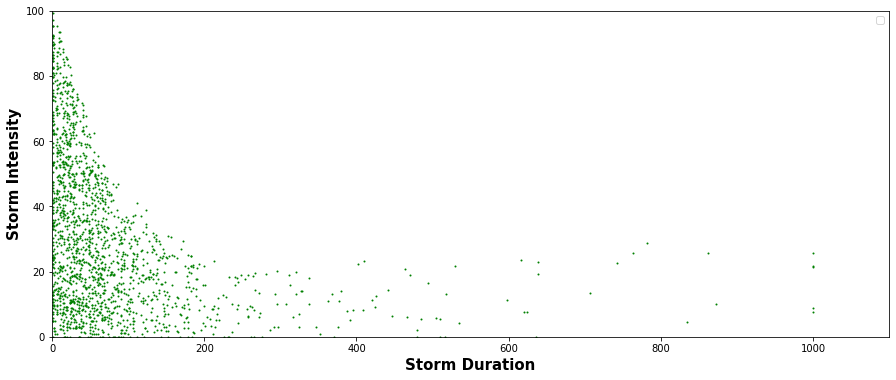

In [5]:
x = df['Storm Duration'].values
y = df['Storm Intensity'].values
plt.figure(figsize =[15,6])
plt.scatter(x,y,color = 'g',s = 1)
plt.xlabel('Storm Duration',fontsize = 15,weight = 'bold')
plt.ylabel('Storm Intensity',fontsize = 15,weight = 'bold')
plt.legend('')
plt.xlim([0 , 1100]);plt.ylim([0 , 100])

# df.plot.scatter(x = 'Storm Duration', y = 'Storm Intensity')

Text(0, 0.5, 'Storm Total')

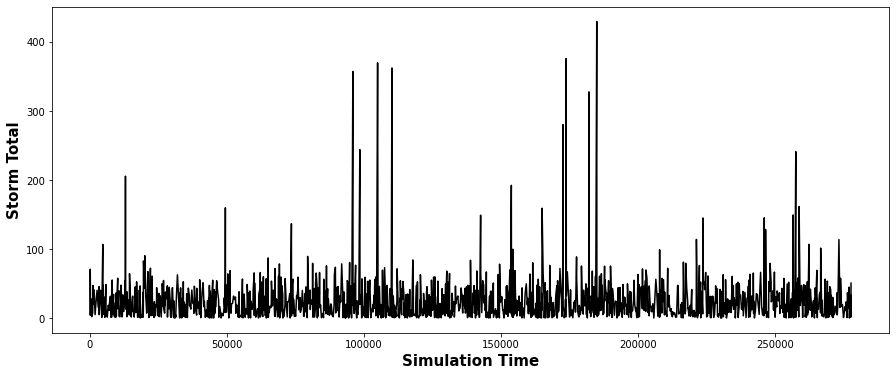

In [6]:
x = df['Simulation Time'].values
y = df['Storm Total'].values
plt.figure(figsize =[15,6])
plt.plot(x,y,'k')
plt.xlabel('Simulation Time',fontsize = 15,weight = 'bold')
plt.ylabel('Storm Total',fontsize = 15,weight = 'bold')

In [7]:
df_area = df[["Storm","Storm Area","UTM Longitude","UTM Latitude"]]
df_area.head()

,Storm,Storm Area,UTM Longitude,UTM Latitude
1,1,4.053430e+07,791283.1126,1441478.389
2,2,1.036272e+08,781283.1126,1447478.389
3,3,1.345697e+08,803283.1126,1435478.389
4,4,9.561037e+07,797283.1126,1431478.389
5,5,2.225465e+07,773283.1126,1455478.389


In [8]:
y = df_area['UTM Latitude'].values
x = df_area['UTM Longitude'].values
area = df_area['Storm Area'].values
r = np.sqrt(area/np.pi)
x = np.argmax(r)
x

975

(1384478.389, 1486478.389)

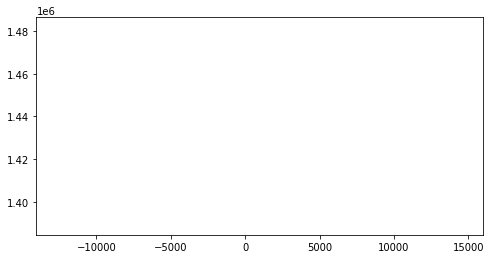

In [9]:
Long = np.loadtxt('Xin.txt')
Lat = np.loadtxt('Yin.txt')
plt.figure(figsize =(8, 4))
plt.scatter(Long,Lat)
plt.xlim([x.min()-15000,x.max()+15000]);plt.ylim([y.min()-15000, y.max()+15000])


TypeError: object of type 'numpy.int64' has no len()

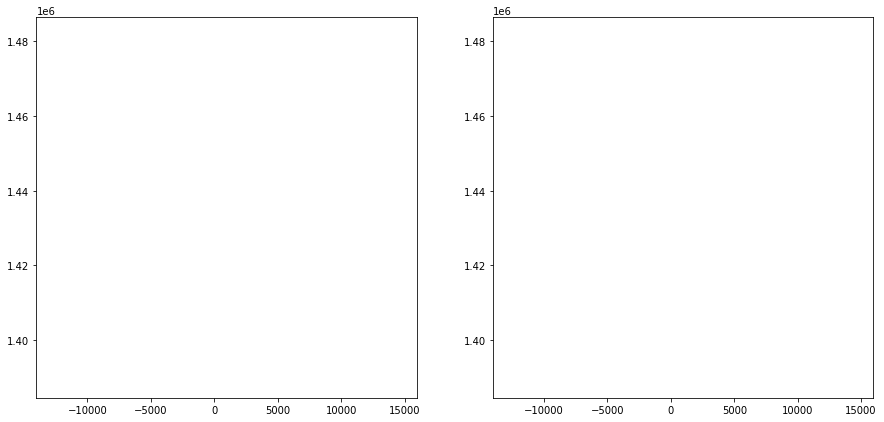

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(Long,Lat,c = 'k',alpha=1)
ax[0].set(xlim=(x.min()-15000,x.max()+15000), ylim = (y.min()-15000, y.max()+15000))
ax[1].set(xlim=(x.min()-15000,x.max()+15000), ylim = (y.min()-15000, y.max()+15000))
for i in range(len(x)):
    a_circle = plt.Circle((x[i], y[i]), r[i],fill = False,ec= 'r',lw = 2)
    ax[1].add_artist(a_circle)


In [12]:
df1 = df[["Storm","Storm Duration","Storm Intensity","Storm Total"]]

In [11]:
df1.head()

,Storm,Storm Duration,Storm Intensity,Storm Total
1,1,44,6.358183,4.662667
2,2,133,31.867431,70.639471
3,3,12,21.361907,4.272381
4,4,30,54.830969,27.415484
5,5,15,7.210879,1.802720


In [12]:
df.loc[:,['Storm','Storm Duration']]

,Storm,Storm Duration
1,1,44
2,2,133
3,3,12
4,4,30
5,5,15
...,...,...
1717,1717,19
1718,1718,29
1719,1719,29
1720,1720,5


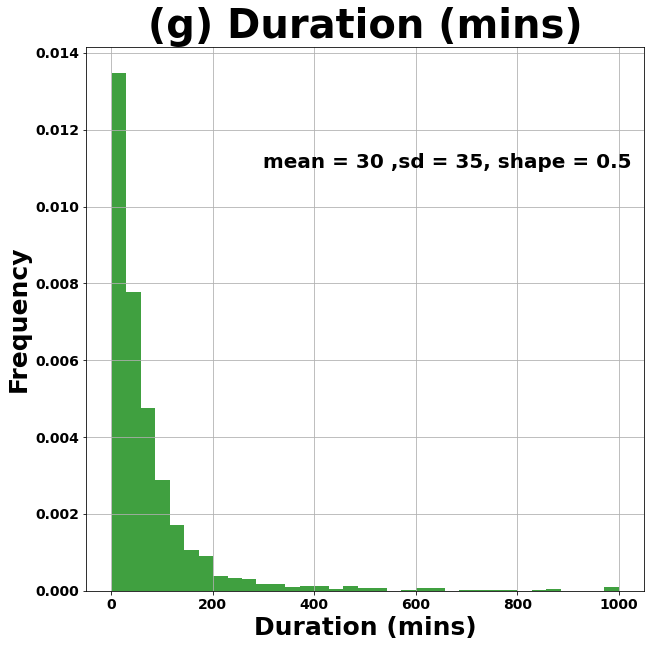

In [64]:
dur = df1['Storm Duration'].values
plt.figure(figsize = (10,10))
plt.hist(dur,bins = 35,density = True,facecolor = 'g',alpha=0.75)
plt.text(300, .011, 'mean = 30 ,sd = 35, shape = 0.5',fontsize = 20,weight = 'bold')
plt.xlabel('Duration (mins)' , size = 25 , weight = 'bold')
plt.ylabel('Frequency', size = 25 , weight = 'bold')
plt.title('(g) Duration (mins)',size = 40 , weight = 'bold')
plt.grid(True)
plt.xticks(fontsize = 14 , weight = 'bold')
plt.yticks(fontsize = 14 , weight = 'bold')
plt.savefig(r'D:\IISc\Project\Stormbang\Results\pictures\Input_pics\duration.jpg',dpi =400)

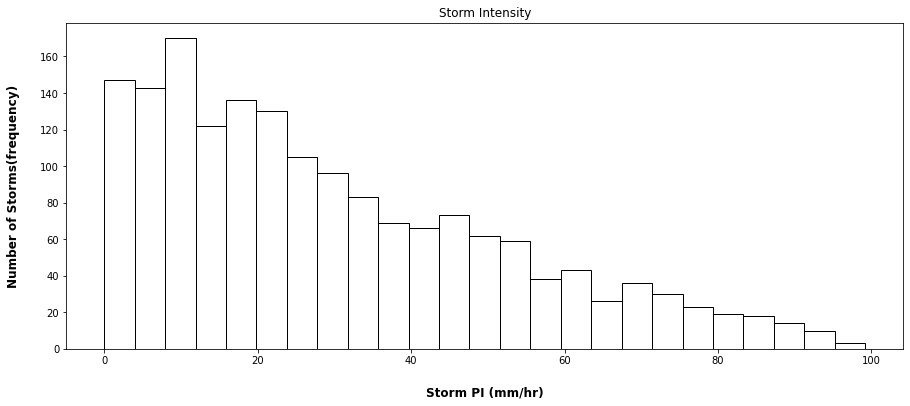

In [13]:
ax = df1.hist(column = 'Storm Intensity', figsize=[15, 6],grid = False, bins = 25,fill=None)
ax = ax[0]
for x in ax:
    x.set_xlabel("Storm PI (mm/hr)", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Number of Storms(frequency)", labelpad=20, weight='bold', size=12)

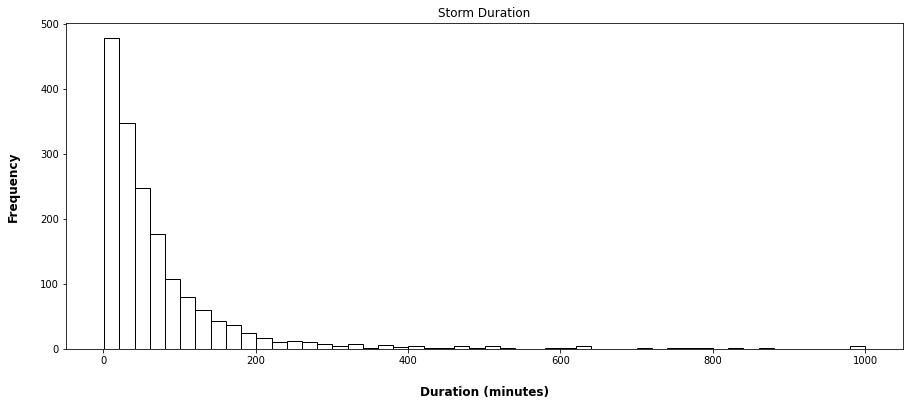

In [14]:
ax = df1.hist(column = 'Storm Duration', figsize=[15, 6],grid = False, bins = 50,fill=None)
ax = ax[0]
for x in ax:
    x.set_xlabel("Duration (minutes)", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
    
    



<AxesSubplot:xlabel='Storm', ylabel='Storm intensity'>

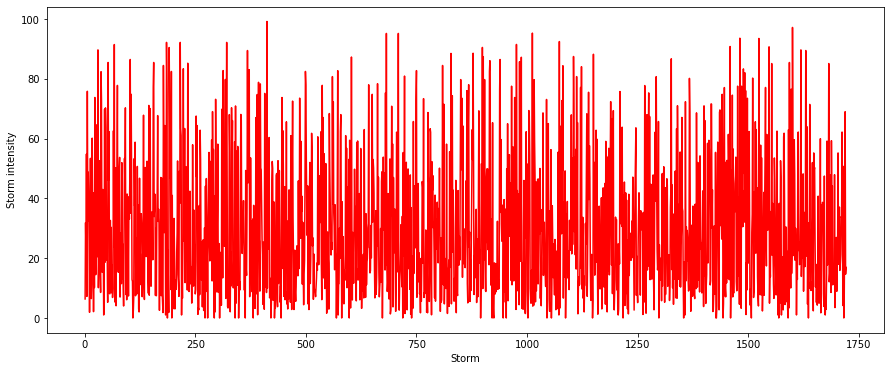

In [16]:
df1.plot(x= 'Storm',y = 'Storm Intensity',ylabel = 'Storm intensity',color = 'r',figsize=[15, 6],legend = None)

<AxesSubplot:xlabel='Storm', ylabel='Storm Total'>

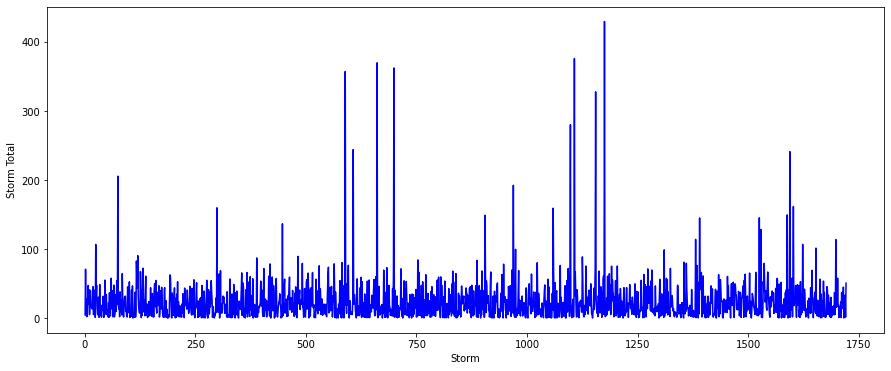

In [17]:
df1.plot(x= 'Storm',y = 'Storm Total',ylabel = 'Storm Total',color = 'b',figsize=[15, 6],legend = None)

<AxesSubplot:xlabel='Storm', ylabel='Duration(mins)'>

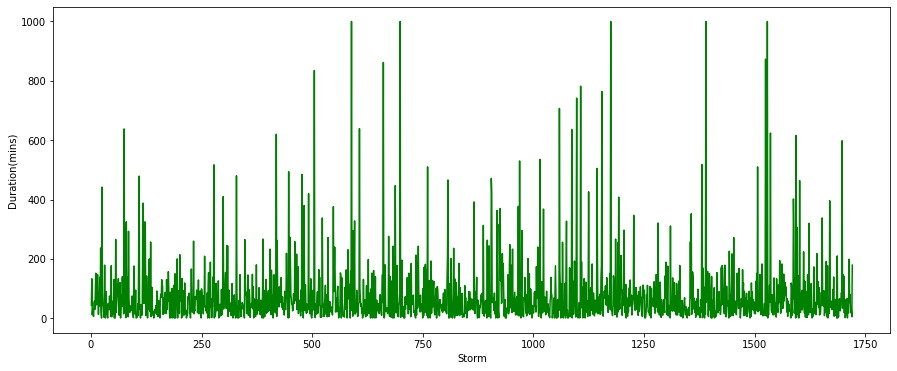

In [18]:
df1.plot(x= 'Storm',y = 'Storm Duration',ylabel = 'Duration(mins)',color = 'g',figsize=[15, 6],legend = None)

In [243]:
    
    sim_years = 5;df_gauge = pd.read_excel(str(sim_years)+'y_gauge_matrix_tot.xlsx',index_col=0)
    df_gauge = df_gauge.round(1)
# df_gauge.to_excel('Gauge_matrix.xlsx')
print(df_gauge.shape[1])

555


In [244]:
dfann = df_gauge[df_gauge['Simulation Year'] == 0]
dfann

,0,1,2,3,4,5,6,7,8,9,...,545,546,547,548,549,550,551,552,553,Simulation Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [245]:
y = []
for i in range(sim_years):
    dfann = df_gauge[df_gauge['Simulation Year'] == i]
    dfann = dfann.iloc[:,0:554].copy()
    for j  in range(0,df_gauge.shape[1]-1):
        add = dfann[j].values
        y.append(np.sum(add))
df_addy = pd.DataFrame(y,columns = ['Simulated Annual Depth'])
df_addy

,Simulated Annual Depth
0,97.3
1,98.5
2,274.4
3,220.4
4,222.3
...,...
2765,371.0
2766,488.8
2767,544.4
2768,289.0


In [246]:

xdepth = df_addy['Simulated Annual Depth'].values.std()
xdepth

171.53709247698976

In [247]:
import plotly.express as px
fig = px.histogram(df_addy, 
                   x='Simulated Annual Depth', 
                   marginal='box',
                   
                   title='Distribution of average annual depth at each gauge')
fig.update_layout(bargap=0.1)
fig.show()

In [248]:
df = pd.read_excel('Ptot.xlsx',index_col=0,header = None)
x = df.to_numpy().flatten()
df = pd.DataFrame(x,index = None,columns = ['Observed Annual Depth'])
ydepth = df['Observed Annual Depth'].values.std()


In [249]:
fig1 = px.histogram(df, 
                    x = 'Observed Annual Depth',
                   marginal='box',
                    
                   
                   title='Distribution of average annual depth at each gauge (Observed)')
fig1.update_layout(bargap=0.1)
fig1.show()

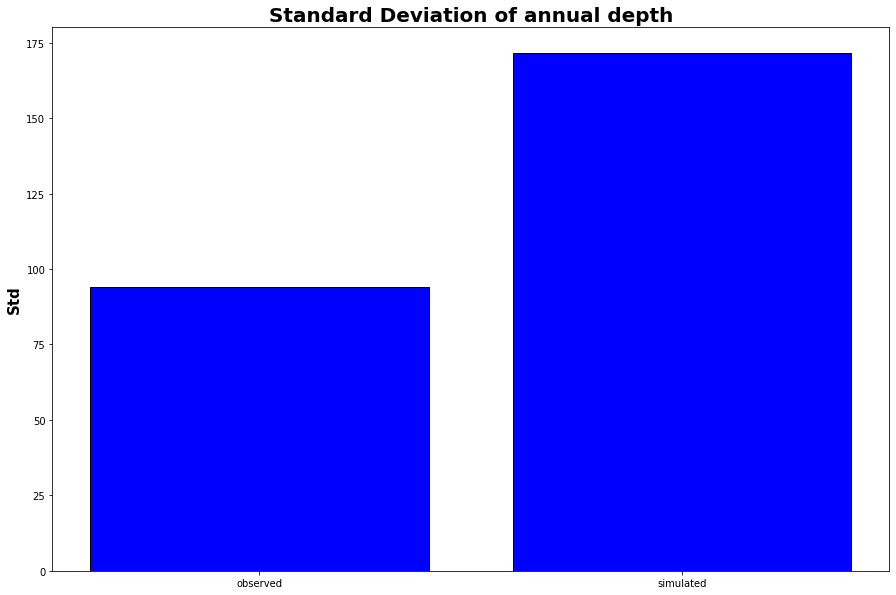

In [250]:
average = {'observed' : ydepth,'simulated':xdepth}
datatype = list(average.keys())
depth = list(average.values())
fig =plt.figure(figsize=(15, 10))
plt.bar(datatype,depth,color = 'blue',edgecolor = 'black')
plt.ylabel('Std', size = 15,weight = 'bold')
plt.title('Standard Deviation of annual depth',size = 20, weight = 'bold')
# plt.axis('off')
plt.savefig('D:\IISc\Project\Stormbang\Results\pictures\{}y_std_depth.jpg'.format(sim_years))

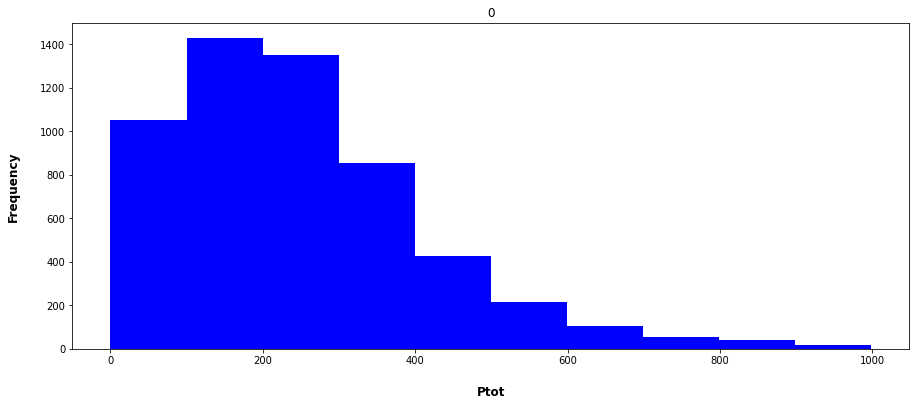

In [45]:

y = []
for i in range(10):
    dfann = df_gauge[df_gauge['Simulation Year'] == i]
    dfann = dfann.iloc[:,0:554].copy()
    for j  in range(0,df_gauge.shape[1]-1):
        add = dfann[j].values
        y.append(np.sum(add))
#plt.hist(y)

df_addy = pd.DataFrame(y)
dftrun = df_addy[df_addy[0] <= 1000]
# dftrun.mean()
ax = dftrun.hist(column = 0, figsize=[15, 6],grid = False, bins = 10,color = 'b'
                      )
ax = ax[0]
for x in ax:
    x.set_xlabel("Ptot", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)         
            
        

In [23]:
df_new = df_gauge[df_gauge[1] != 0]
df_new = df_new.iloc[:,0:554]

In [24]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,544,545,546,547,548,549,550,551,552,553
119,42.895487,42.996839,42.899450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,36.806630,37.469332,36.832350,0.000000,0.000000,38.112361,40.180206,40.903650,40.208285,38.165646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,17.590726,18.047342,18.204222,18.053458,17.602651,0.000000,17.742515,18.203071,18.361305,18.209239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,21.826341,21.646467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,2.624191,2.537571,0.000000,0.000000,0.000000,2.683751,2.654290,2.566676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
l = []
for i in range(1,556):
    if i == 555:
        l1 = 'Simulation  Year'
    else:
        l1 = 'Gauge '+str(i)
    
    l.append(l1)
l[554]

'Simulation  Year'

In [34]:
df_gauge.columns = l
df_gauge.head()

,Gauge 1,Gauge 2,Gauge 3,Gauge 4,Gauge 5,Gauge 6,Gauge 7,Gauge 8,Gauge 9,Gauge 10,...,Gauge 546,Gauge 547,Gauge 548,Gauge 549,Gauge 550,Gauge 551,Gauge 552,Gauge 553,Gauge 554,Simulation Year
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.988294,0.0,0.0,0.0,0.0,4.043755,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [49]:
x = []
l = l.remove('Simulation  Year')
for i in range(1,555):
    df_new = df_gauge.loc[:,'Gauge '+str(i)].copy()
    df_new1 = df_new[df_new != 0]
    y = df_new1.shape[0]
    x.append(y)
#df_new1 = df_new1[df_new1.columns.difference(['Simulation  Year'])]
df_gaugeshit = pd.DataFrame(x,index = l ,columns = ['Number of storms hit in 5 years'])
df_gaugeshit.to_excel('Gaugeshit.xlsx')


In [50]:
df_gaugeshit[df_gaugeshit['Number of storms hit in 5 years'] == df_gaugeshit['Number of storms hit in 5 years'].max()]

,Number of storms hit in 5 years
173,58


In [51]:
df_gaugeshit['Number of storms hit in 5 years'].max()

58

In [52]:
df_gaugeshit.tail()

,Number of storms hit in 5 years
549,36
550,33
551,30
552,36
553,35


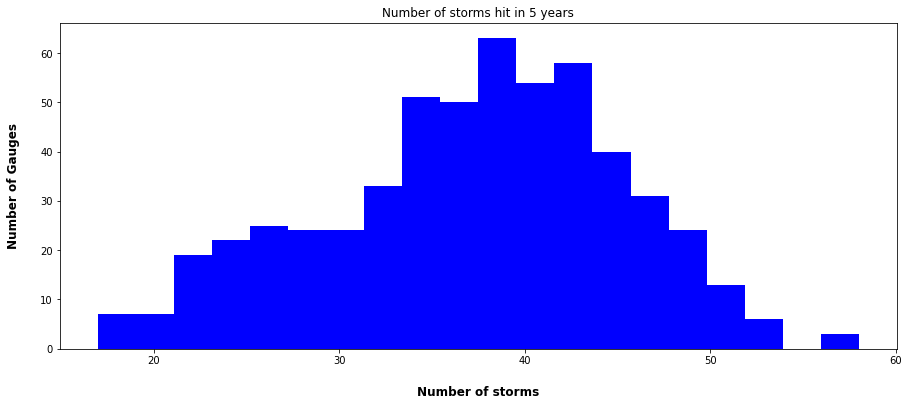

In [42]:
ax = df_gaugeshit.hist(column = 'Number of storms hit in 5 years', figsize=[15, 6],grid = False, bins = 20,color = 'b'
                      )
ax = ax[0]
for x in ax:
    x.set_xlabel("Number of storms", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Number of Gauges", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Number of Gauges')

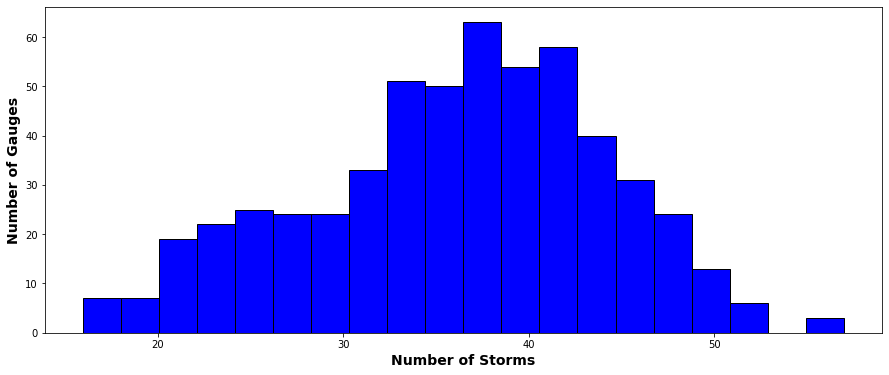

In [53]:
number = df_gaugeshit['Number of storms hit in 5 years'].values
plt.figure(figsize =(15, 6))
plt.hist(number, bins=20, align='left', color='b', edgecolor='k',
              linewidth=1)
plt.xlabel('Number of Storms',fontweight ='bold',fontsize = 14)
plt.ylabel('Number of Gauges',fontweight ='bold',fontsize = 14)
                      

In [ ]:
Long = np.loadtxt('Xin.txt')
Lat = np.loadtxt('Yin.txt')